In [1]:
import os
import pandas as pd
from ipywidgets.widgets import Dropdown, interact
from ipywidgets import Button, HBox, VBox, interactive_output


In [2]:
os.listdir('data')

['holidays_events.parquet.gzip',
 'oil.parquet.gzip',
 'sample_submission.parquet.gzip',
 'stores.parquet.gzip',
 'test.parquet.gzip',
 'train.parquet.gzip',
 'transactions.parquet.gzip']

In [67]:
all_data = {}
for file in os.listdir('data'):
    filename = file.split('.')[0]
    all_data[filename] = pd.read_parquet('data/{}'.format(file),)
    
all_data.keys()

dict_keys(['holidays_events', 'oil', 'sample_submission', 'stores', 'test', 'train', 'transactions'])

In [68]:
train, stores, holidays_events, oil = (all_data['train'], all_data['stores'], 
         all_data['holidays_events'], all_data['oil'])


In [69]:
for data in (train, holidays_events, oil):
    data['date'] = data['date'].astype('datetime64[ns]')

In [70]:
train = train.merge(holidays_events,on='date', how='left').merge(oil,on='date', how='left')
train.head()

,id,date,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN


In [71]:
unique_stores = stores['store_nbr'].unique().tolist()
unique_famliy = train['family'].unique().tolist()
stores_widget = Dropdown(options = unique_stores)
category_widget = Dropdown(options = unique_famliy)

# Define a function that updates the content of y based on what we select for x
# def update(*args):
#     category_widget.options = train.loc[train['store_nbr']==stores_widget.value, 'family'].unique().tolist()
# stores_widget.observe(update)

# Some function you want executed
def plot_data(store, family):
    sales = train.loc[(train['store_nbr']==store) & (train['family']==family), ['date', 'sales']] 
    sales.set_index('date').plot(title = 'Store Number {},  Product Family {}'.format(store, family), figsize=(15,5))
    
#     fig = go.Figure()
#     fig.add_trace(go.Scatter(x=sales['date'], y=sales['sales'],
#                         mode='lines',
#                         name='{},{}'.format(store, family)))
#     fig.update_layout(title_x = 0.5, title = 'Store Number {},  Product Family {}'.format(store, family))
#     fig.show()

interact(plot_data,
         store = stores_widget,
         family = category_widget);

interactive(children=(Dropdown(description='store', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15…

<AxesSubplot:title={'center':'Oil Prices VS Sales  (Scaled Values)'}, xlabel='date'>

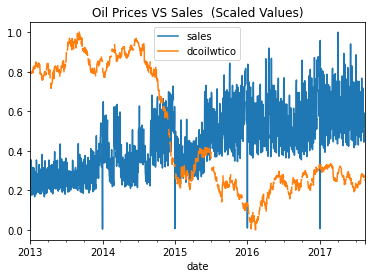

In [72]:
# plotting mean sales and oil prices with normalization
def scale_down(X):
    X_min = X.min()
    X_max = X.max()
    return (X - X_min)/(X_max - X_min)
train[['date','sales','dcoilwtico']].set_index('date')\
                                    .resample('d')\
                                    .mean()\
                                    .apply(scale_down, axis=0)\
                                    .plot(title = 'Oil Prices VS Sales  (Scaled Values)')

In [79]:
holidays_sales = train.loc[train['type'].isin(['Holiday','Event'])].set_index('date')
normal_sales = train.loc[~train['type'].isin(['Holiday','Event'])].set_index('date')

def plot_daily_sales(df):
    return df.resample('d').mean()['sales'].plot(alpha=0.25)

